# K-Means Hypothesis Function

### Introduction

In the last lesson we saw how we can use k-means clustering to group our data.  We did so in sklearn, with the following lines of code:


```python
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=9, init='random')
kmean.fit(X_geo)
```

In this lesson, let's begin to understand the k-means clustering algorithm by unpacking the hypothesis function.  Along the way, we'll learn about centroids and how they play a role in the hypothesis function of our kmeans clustering algorithm.  And we'll also learn why kmeans clustering qualifies as an unsupervised learning algorithm. 

### Hypothesis Function

Let's start off by loading and training our model.  

In [2]:
import pandas as pd
df_train = pd.read_feather('./bnb_train.feather')
X_geo = df_train.loc[:, ['longitude', 'latitude']]

from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=9, init='random')
kmean.fit(X_geo)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=9,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [3]:
kmean.labels_[:3]

array([1, 0, 0], dtype=int32)

Now, how do we understand the hypothesis function for kmeans clustering?  Well, for kmeans clustering we output a label that places each observation in a group.  Where does this label come from?  

Take a look at the plot below.

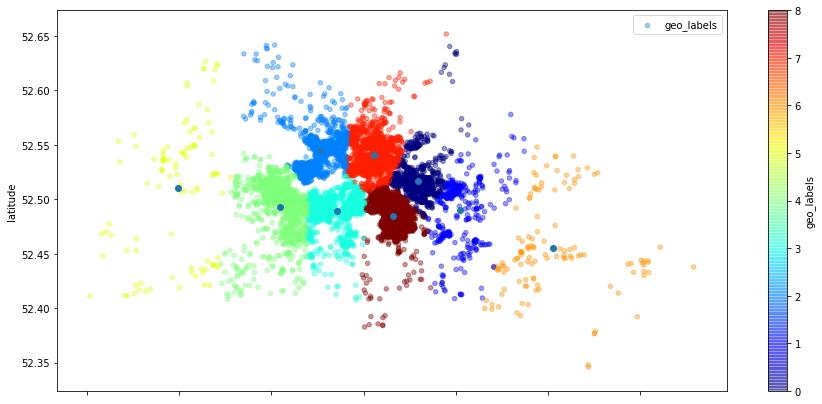

In [40]:
import matplotlib.pyplot as plt

df_X_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            label="geo_labels",
            c="geo_labels", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(15,7))
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1])
plt.legend()

The blue dots in the center are called the centroids.  A centroid is just a point on the graph.  We can take a look at the each of our centroids, which in sklearn are called cluster centers.

In [5]:
kmean.cluster_centers_

array([[13.50461169, 52.49050636],
       [13.41176757, 52.54029867],
       [13.35296108, 52.54461626],
       [13.43186856, 52.48488265],
       [13.45900299, 52.51650482],
       [13.30900713, 52.49251953],
       [13.60523213, 52.45498044],
       [13.1987617 , 52.51030432],
       [13.37135399, 52.48912575]])

So, for each observation, we simply find closest centroid, and the centroid's corresponding label is assigned.

More formally, let's say that $u$ is a centroid in the set of centroids $\{u_1...u_k\}$

We can then define our our hypothesis function as:

$h_\theta(x)=\underset{u}{\mathrm{argmin}} || u - x_i||^2$

In other words, for the hypothesis function we input our observation features, and we return the closest centroid. 

### Supervised vs Unsupervised

Notice how here our hypothesis function is different than in previous algorithms.  In previous lessons, we have seen a type of machine learning where called supervised learning.  With supervised learning, we have a feature matrix X, and a target vector $y$, and the goal is to find the parameters, $\theta$ that predict $y$.

Clustering is our first example of an unsupervised learning problem.  With our unsupervised learning problem we no longer are considering our target variable in the training of our hypothesis function.  Instead we feed our clustering algorithm a feature matrix, and we return a grouping of those features. 

Before moving onto the cost function, let's take step back to compare our unsupervised hypothesis function with our supervised hypothesis function.

* supervised: 
    * $h_\theta(x_i) \approx y_i $
* unsupervised: 
    * $h_\theta(x_i) \approx x_i $

So in both cases we trying to come close to an observation, it's just that in supervised learning we try to come close to the observation's target variable, while with supervised learning we come close to the observation's original features.

### Summary

In this lesson, we gained a deeper understanding of the hypothesis function for k-means clustering.  As we saw kmeans clustering works by taking in a set of features. and outputting a set of labels.

The kmeans algorithm defines a label based on how close the observation is to a centroid.  With the label of an observation corresponding to the closest centroid.  Or, more formally:

$h_\theta(x)=\underset{u}{\mathrm{argmin}} || u - x_i||^2$

Where $u$ is a centroid in the set of centroids $\{u_1...u_k\}$.

In the next lesson, we'll learn how we can train our model to find these centroids.